### **Business Understanding**

## **Background**

The AWS SaaS (Software as a Service) model is a cloud-based software delivery framework that provides applications to end-users via web browsers. SaaS providers host services and applications for clients on a scalable, on-demand basis. Within the SaaS paradigm, clients are relieved of concerns about service maintenance and infrastructure management, as their primary focus is on software utilization. Additionally, SaaS typically employs a subscription-based or pay-as-you-go pricing model, as opposed to the traditional upfront purchase of complete functionality.

A quintessential example of a SaaS application is web-based email, where users can efficiently send and receive emails without the need to manage feature enhancements or maintain the servers and operating systems underlying the email software.

## **Primary Analysis**

1. **Profitability** Identify the most profitable and least profitable customer segments by analyzing sales, discounts, and profits. Determine which factors (e.g., discounts, product types, or customer segments) are strongly associated with high profitability.
2. **Market** Understand which products are often purchased together. This insight could help in bundling products, improving marketing strategies, and offering targeted discounts.
3. **Geographical** Analyze sales trends based on geographical data. Identify potential markets that may be underserved and regions that could be targeted for increased sales efforts.

## **Intended impact on business strategic decision making**

1. **Profitability Analysis**:
   - **Enhanced Targeting**: Enables precise marketing and premium offerings for profitable segments.
   - **Resource Efficiency**: Redirects resources to high-profit customers, optimizing expenditures.
   - **Strategic Pricing**: Guides differential pricing and evaluates discount impacts on margins.
   - **Product Evolution**: Drives innovation tailored to profitable customer preferences.
   - **Risk Diversification**: Spreads business focus across multiple segments, reducing dependency.


2. **Market Basket Analysis**:
   - **Effective Cross-Selling**: Facilitates strategies that increase transaction value through combined sales.
   - **Inventory Precision**: Aligns inventory management with combined purchasing trends.
   - **Incentivized Bundling**: Encourages higher spend through discounted product packages.
   - **Targeted Marketing**: Enhances campaign resonance by highlighting related products.
   - **Personalized Shopping**: Elevates customer loyalty with a buying experience reflecting known preferences.


3. **Geographical Sales Analysis**:
   - **Strategic Expansion**: Directs growth efforts to regions with untapped potential.
   - **Cultural Resonance**: Tailors marketing to local preferences, increasing engagement.
   - **Logistical Efficiency**: Optimizes supply chain based on regional sales data.
   - **Localized Sales Approaches**: Adapts sales tactics to regional market nuances.
   - **Competitive Foresight**: Identifies overlooked markets for potential first-mover advantage.



## **Column Identifiers**

- **Row ID**: A unique identifier for each transaction.
- **Order ID**: A unique identifier for each order.
- **Order Date**: The date when the order was placed.
- **Date Key**: A numerical representation of the order date (YYYYMMDD).
- **Contact Name**: The name of the person who placed the order.
- **Country**: The country where the order was placed.
- **City**: The city where the order was placed.
- **Region**: The region where the order was placed.
- **Subregion**: The subregion where the order was placed.
- **Customer**: The name of the company that placed the order.
- **Customer ID**: A unique identifier for each customer.
- **Industry**: The industry the customer belongs to.
- **Segment**: The customer segment (SMB, Strategic, Enterprise, etc.).
- **Product**: The product that was ordered.
- **License**: The license key for the product.
- **Sales**: The total sales amount for the transaction.
- **Quantity**: The total number of items in the transaction.
- **Discount**: The discount applied to the transaction.
- **Profit**: The profit from the transaction.


## **Load Data & Overview**

In [173]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [174]:
#Load dataset
df = pd.read_csv("saas.csv")

#Display the first few rows to understand its structure
df.head() 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [175]:
# Check for null rows and handle them if necessary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

From the structure of the dataset above, it can be summarized that there no null values which are present in the dataset which may hamper future data analysis.

In [176]:
# Check for duplicate rows and handle them if necessary

print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


The dataset can also be summarized that there no duplicate values which are present in the dataset thus no handling is necessary.

In [177]:
import pandas as pd

# Assuming 'df' is your DataFrame and you've calculated 'descriptive_stats' and 'variance' as before
descriptive_stats = df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

variance = df[['Sales', 'Quantity', 'Discount', 'Profit']].var()
variance_df = pd.DataFrame(variance).T.rename(index={0: 'variance'})

# Using 'concat' instead of 'append'
descriptive_stats_with_variance = pd.concat([descriptive_stats, variance_df])

descriptive_stats_with_variance


,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000
variance,388434.455308,4.951113,0.042622,54877.798055


### **Descriptive Summary of Dataset**

**Sales:**

- Mean: Approximately $229.86, indicating the average sales amount per order.
- Standard Deviation: Approximately $623.25, showing a wide variation in sales amounts, which is also evident from the large difference between the minimum and maximum values.
- Minimum: $0.44, the lowest sales amount.
- Maximum: $22,638.48, the highest sales amount, indicating that there are some orders significantly larger than the average.
- Variance: Approximately 388,434.45, confirming a high dispersion in the sales data.

**Quantity:**

- Mean: Approximately 3.79, suggesting that, on average, customers buy around 3 to 4 units per order.
- Standard Deviation: Approximately 2.23, indicating a moderate variability in the quantity per order.
- Minimum: 1, which is expected since this is the smallest order possible.
- Maximum: 14, suggesting that some orders are substantially larger in quantity.
- Variance: Approximately 4.95, suggesting a moderate spread from the mean.

**Discount:**

- Mean: Approximately 0.16, indicating that the average discount given is 16%.
- Standard Deviation: Approximately 0.21, indicating variability in the discounts provided.
- Minimum: 0, indicating some orders received no discounts.
- Maximum: 0.8, indicating that the highest discount given is 80%.
- Variance: Approximately 0.04, indicating a relatively tight distribution of discounts around the average.

**Profit:**

- Mean: Approximately $28.66, indicating the average profit from each order.
- Standard Deviation: Approximately $234.26, showing a very high variation in profit, hinting at the presence of both high-profit and loss-making orders.
- Minimum: -$6,599.98, indicating that some orders resulted in significant losses.
- Maximum: $8,399.98, indicating that some orders were highly profitable.
- Variance: Approximately 54,877.80, showing a very high variability in profits.


In [178]:
import pandas as pd

# Sort profit b 5 top minimum amount of profit gained
sorted_df = df.nsmallest(5, 'Profit')

# Show sorted data
sorted_df.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7772,7773,AMER-2022-108196,11/26/2022,20221126,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.9780
683,684,EMEA-2023-168116,11/5/2023,20231105,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904
9774,9775,APJ-2020-169019,7/26/2020,20200726,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928
3011,3012,EMEA-2023-134845,4/18/2023,20230418,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800
4991,4992,APJ-2023-122714,12/8/2023,20231208,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845


Negative values have been identified in the dataset and after determining several conclusions it has been determined that the negative values is present due to the discount factor in several sales. Resulting in a negative profit value.

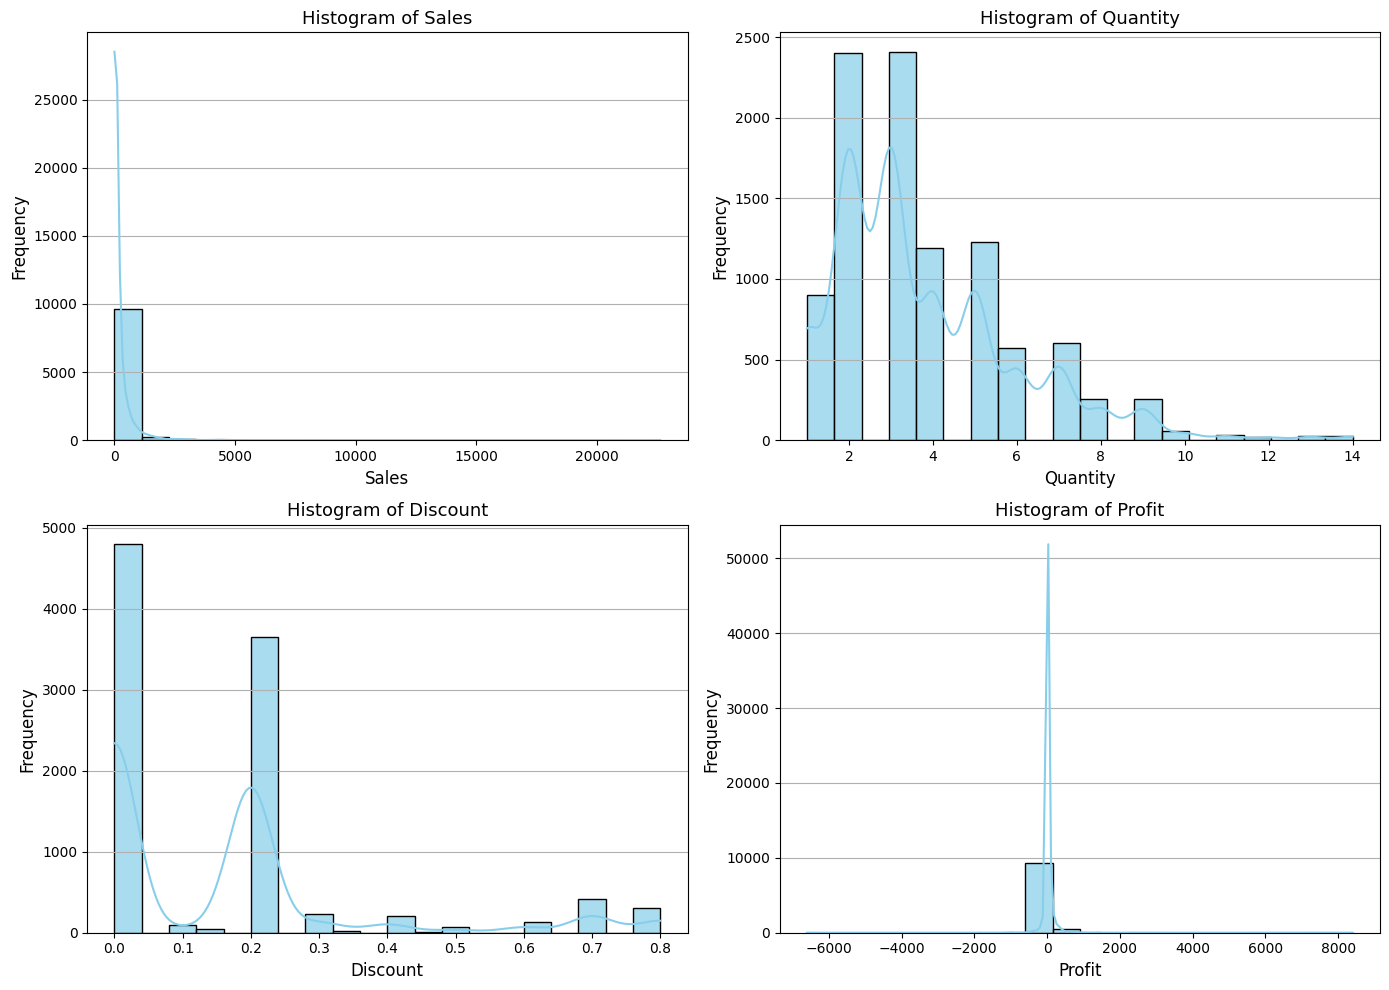

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline within the Jupyter notebook
%matplotlib inline

# Selecting the data for the histogram
data_to_plot = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Creating a figure to contain the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of column names to be plotted
columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Create a histogram with a line (density plot) for each column
for i, column in enumerate(columns):
    sns.histplot(data=data_to_plot, x=column, kde=True, ax=axes[i], bins=20, color='skyblue', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}', fontsize=13)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].grid(axis='y')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


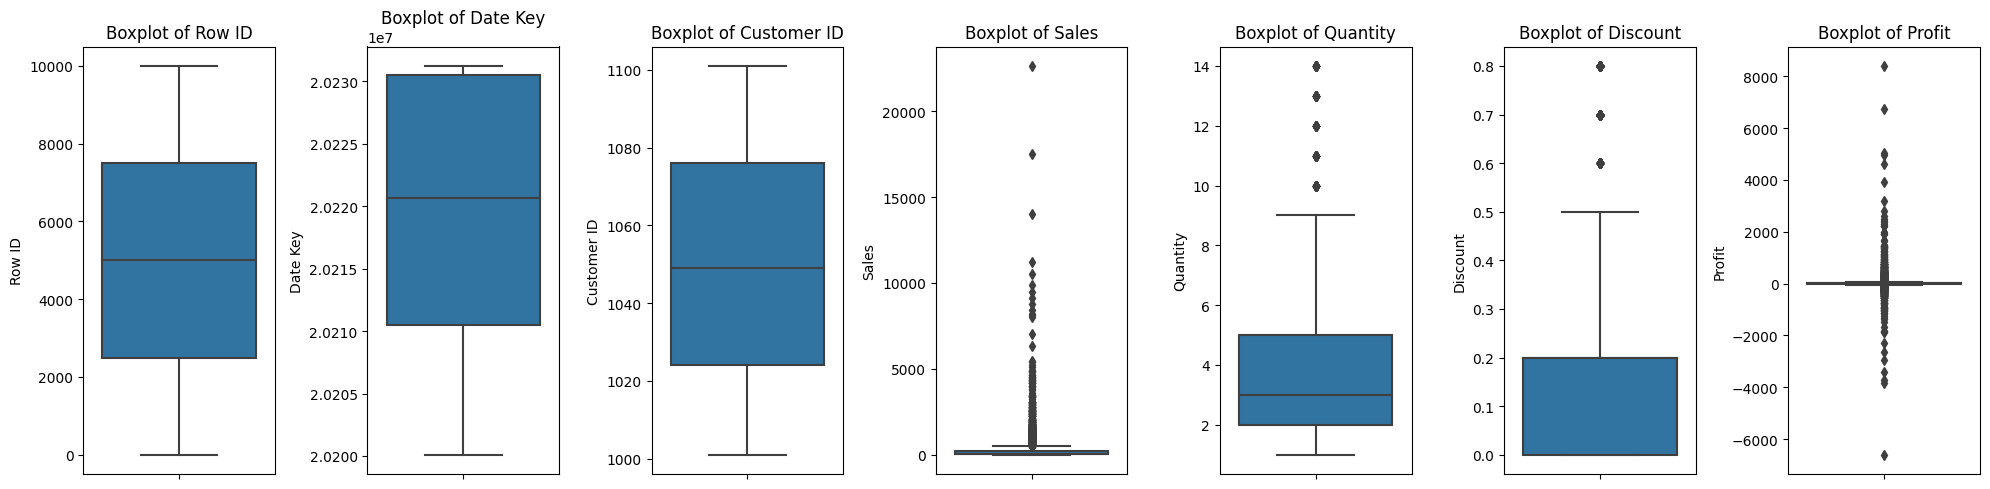

In [180]:
# Correcting the approach by ensuring only numerical columns are used for the boxplots.
# This involves filtering out non-numeric data before attempting to plot.

# Extracting only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])  # This line ensures only numeric columns are selected

# Now, we create boxplots only for these numeric columns
plt.figure(figsize=(20, 5))

# We will attempt to create plots only for the numeric columns
for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(1, len(numeric_cols.columns), i)
    sns.boxplot(y=numeric_cols[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [181]:
# Dictionary to store outliers' information
outliers_info = {}

for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }

# 'outliers_info' contains detailed information about the outliers.

# Creating a summary of the information
outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

outliers_summary


{'Sales': {'bounds': (-271.71000000000004, 498.93),
  'number_of_outliers': 1167},
 'Quantity': {'bounds': (-2.5, 9.5), 'number_of_outliers': 170},
 'Discount': {'bounds': (-0.30000000000000004, 0.5),
  'number_of_outliers': 856},
 'Profit': {'bounds': (-39.724125, 70.816875), 'number_of_outliers': 1881}}

### **Outlier Analysis Summary**

1. **Sales**:
    - The 'normal' range for Sales is calculated to be between approximately -271.71 and 498.93. Any Sales value below -271.71 or above 498.93 is considered an outlier.
    - There are 1167 entries in the Sales column that are identified as outliers, i.e., 1167 sales records are outside the typical range of sales values.

2. **Quantity**:
    - For Quantity, the acceptable range is between -2.5 and 9.5. The negative lower bound suggests that any low quantity would be within the normal range, likely because the calculation doesn't inherently consider the impossibility of negative quantities for this context.
    - There are 170 quantity records outside of this range, indicating these transactions involved a notably low or high quantity of items compared to the rest.

3. **Discount**:
    - The normal range for discounts is between approximately -0.30 and 0.50. Given that negative discounts (increasing the price) aren't practical, this suggests that any discount of 0.5 or higher is unusual within this dataset.
    - There are 856 records where the discount given is outside the normal range, indicating special circumstances or possibly erroneous entries.

4. **Profit**:
    - For Profit, the values are considered outliers if they are below approximately -39.72 or above 70.82. This range indicates what the typical profit (or loss) per transaction is, and values outside of this range are exceptionally high or low.
    - There are 1881 profit values that are outliers. This high number indicates a significant variability in the profit margins, with many transactions either making a much larger profit or incurring a greater loss than usual.

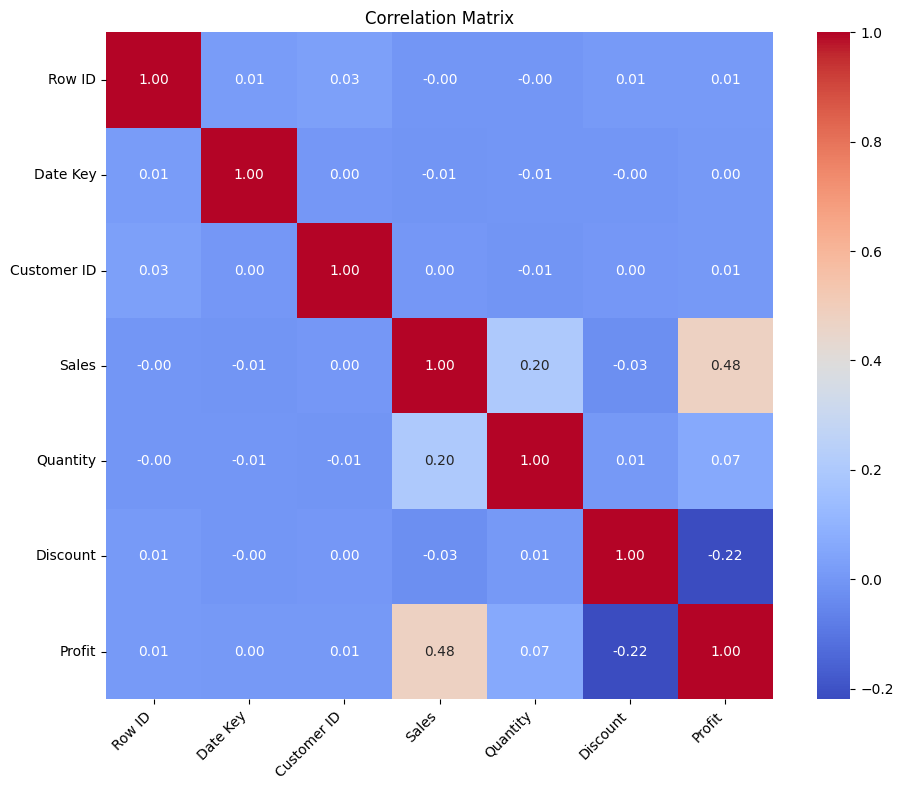

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Size is customizable
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")

# Enhancements for better readability
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Correlation Matrix Findings**
- Quantity & Sales: Have a positive correlation of 0.20
- Profit & Sales: Have a positive correlation of 0.48
- Profit & Quantity: Have a positive correlation of 0.07
- Profit & Discount: Have a negative correlation of -0.22
